<a href="https://colab.research.google.com/github/DariyaSavva/Machine-Learning/blob/main/Dataset_Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Число пропущенных значений в таблице данных:  0


,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00
mean,4.01,60.21,47.90,3218.25,36190.62,10.05,523.01,174.77,5.52,5.51,29.49,29.24,656070.56
std,0.58,17.40,14.34,1824.90,18630.15,5.52,277.22,72.00,2.58,2.59,20.03,20.00,267413.74
min,3.00,30.00,25.00,604.00,5277.00,1.00,50.00,50.01,1.00,1.00,0.00,0.00,184708.52
25%,3.50,45.00,35.49,1889.00,22592.50,5.00,277.00,113.31,3.30,3.20,13.00,13.00,454651.40
50%,4.00,60.00,45.53,2846.50,32518.50,10.00,528.00,173.91,5.50,5.60,27.00,26.00,604242.08
75%,4.50,75.00,60.30,4008.50,44566.25,15.00,764.25,237.41,7.80,7.80,43.00,43.00,813094.23
max,5.00,90.00,76.00,9978.00,103777.00,19.00,999.00,299.98,10.00,10.00,88.00,88.00,1531867.55



ИНТЕРПРЕТАЦИЯ ЧИСЛОВЫХ ХАРАКТЕРИСТИК:

ОБЩИЙ АНАЛИЗ:
Все числовые переменные демонстрируют значительный разброс значений, что свидетельствует о разнообразии ресторанов в выборке.
Есть выбросы почти для всех параметров, чаще всего выбросы - это рестораны с очень высокими показателями по размеру выручки,
количеству подписчиков и т.д. По многим параметрам в выборке наблюдается правосторонняя ассиметрия в сторону более успешных ресторанов.

АНАЛИЗ ЦЕЛЕВОГО ПОКАЗАТЕЛЯ ВЫРУЧКИ (Revenue):
Стандартное отклонение 267 413.74 очень велико, что означает большой разброс
ресторанов с разным уровнем дохода, как ниже так, и выше среднего.
Так как средняя выручка: 656 070.56 больше медианы 604,242.08, то 
распределение правостороннее - то есть в выборке чаще представлены
рестораны с более высоким уровнем дохода

АНАЛИЗ КОНКРЕТНЫХ ПОКАЗАТЕЛЕЙ РЕСТОРАНОВ:

Вместимость ресторанов распределена симметрично - среднее значение 60.21
практически совпадает с медианой 60.00. Типичный ресторан имеет от 45 до 75 

,Location,Cuisine,Parking Availability
count,8368,8368,8368
unique,3,6,2
top,Downtown,French,Yes
freq,2821,1433,4189



АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ

РАСПРЕДЕЛЕНИЕ ПО МЕСТОПОЛОЖЕНИЮ (Location):
Всего 3 типа локаций: Downtown (центр города), Suburban (пригород), Rural (сельская местность)
Наиболее частый тип: Downtown (2821 ресторан)
Это составляет 33.7% от всех ресторанов, что делает центральные локации более популярными

ТИПЫ КУХОНЬ (Cuisine):
Представлено 6 различных кухонь
Самая распространенная: French (1433 ресторана)
Французская кухня занимает 17.1% от общего числа, что свидетельствует о ее популярности
Распределение между кухнями относительно равномерное

НАЛИЧИЕ ПАРКОВКИ (Parking Availability):
Практически равномерное распределение: 4189 ресторанов с парковкой и 4179 без
50.1% ресторанов имеют парковку, 49.9% - нет
Это указывает на то, что наличие парковки не является доминирующим фактором в выборке

ОБЩИЕ ВЫВОДЫ:
- Выборка хорошо сбалансирована по географическому признаку и типам кухонь
- Центральные локации (Downtown) преобладают, что логично для ресторанного бизнеса
- Отсутствие сильного

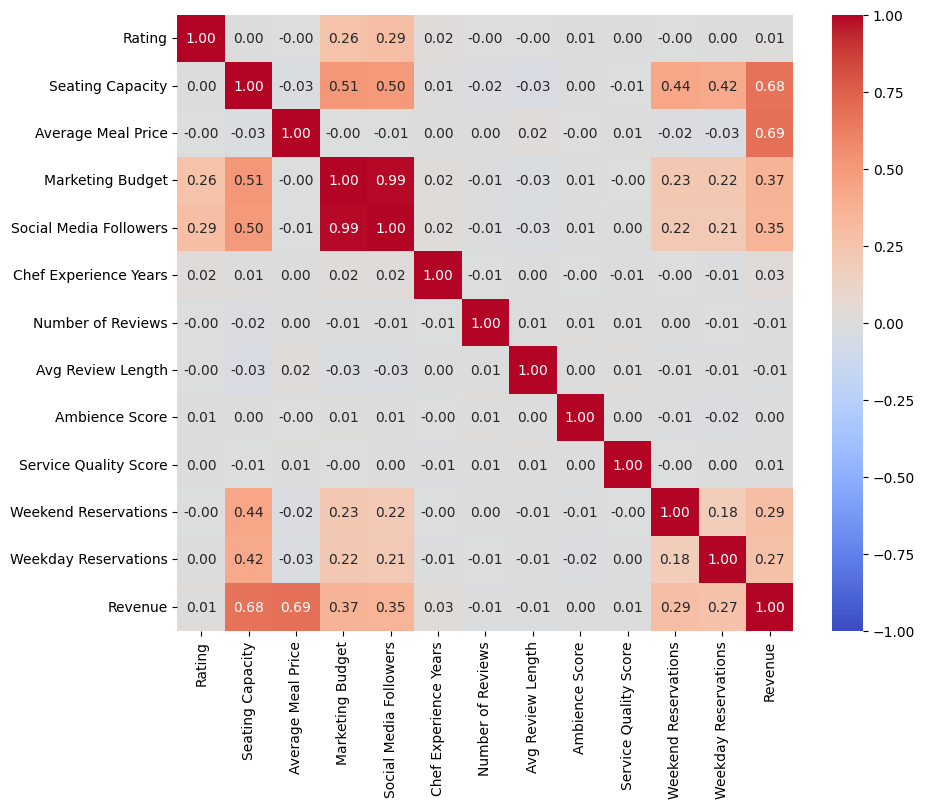

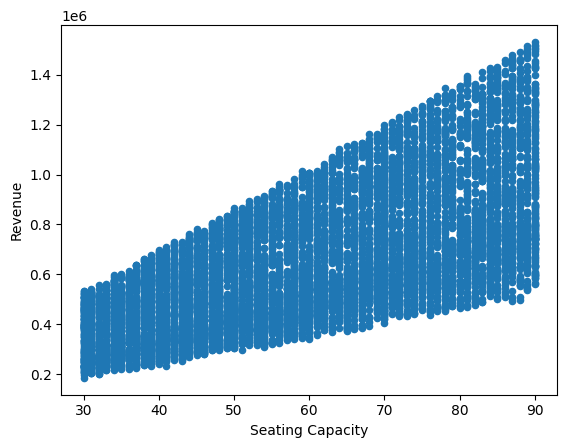

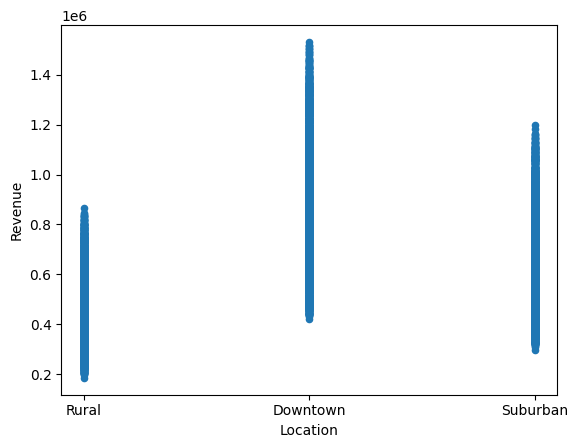

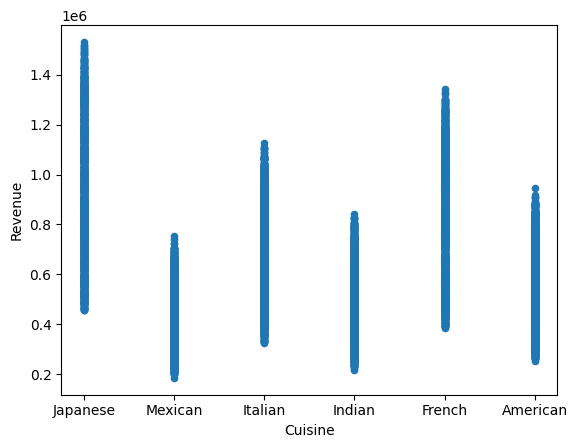

In [10]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from IPython.display import display
import io
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/DariyaSavva/Machine-Learning/main/restaurant_data.csv"
data_raw = pd.read_csv(url)


data_raw["Cuisine"] = data_raw["Cuisine"].astype('category')
data_raw["Location"] = data_raw["Location"].astype('category')
data_raw["Parking Availability"] = data_raw["Parking Availability"].astype('category')

#data_raw.info()
data_raw = data_raw.set_index('Name')


# выводим матрицу корелляции
corr_mat = data_raw.corr(numeric_only=True)
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')


#проверили, что нет пропущенных значений
not_is_null_value = (data_raw.isnull().sum().sum() == 0)
print("Число пропущенных значений в таблице данных: ", data_raw.isnull().sum().sum())

# выводим числовые признаки
description = data_raw.describe()
styled_table = description.style
styled_table = data_raw.describe().style\
    .format('{:.2f}')\
    .set_caption('Характеристики для числовых признаков')
display(styled_table)
# интерпретация:
print("""
ИНТЕРПРЕТАЦИЯ ЧИСЛОВЫХ ХАРАКТЕРИСТИК:

ОБЩИЙ АНАЛИЗ:
Все числовые переменные демонстрируют значительный разброс значений, что свидетельствует о разнообразии ресторанов в выборке.
Есть выбросы почти для всех параметров, чаще всего выбросы - это рестораны с очень высокими показателями по размеру выручки,
количеству подписчиков и т.д. По многим параметрам в выборке наблюдается правосторонняя ассиметрия в сторону более успешных ресторанов.

АНАЛИЗ ЦЕЛЕВОГО ПОКАЗАТЕЛЯ ВЫРУЧКИ (Revenue):
Стандартное отклонение 267 413.74 очень велико, что означает большой разброс
ресторанов с разным уровнем дохода, как ниже так, и выше среднего.
Так как средняя выручка: 656 070.56 больше медианы 604,242.08, то
распределение правостороннее - то есть в выборке чаще представлены
рестораны с более высоким уровнем дохода

АНАЛИЗ КОНКРЕТНЫХ ПОКАЗАТЕЛЕЙ РЕСТОРАНОВ:

Вместимость ресторанов распределена симметрично - среднее значение 60.21
практически совпадает с медианой 60.00. Типичный ресторан имеет от 45 до 75 мест,
что соответствует межквартильному диапазону.

Маркетинговый бюджет ресторанов демонстрирует правостороннюю асимметрию распределения:
среднее значение 3,218.25 превышает медиану 2,846.50 на 371.75. Это указывает на то,
что некоторые рестораны инвестируют в продвижение значительно больше среднего, формируя
"хвост" распределения в сторону высоких значений.

Еще более выраженная асимметрия наблюдается в показателях социальных сетей. Количество подписчиков имеет
среднее значение 36 190.62 при медиане 32 518.50, что создает разницу в 3 672.12.
Такой значительный разрыв между средним и медианой свидетельствует о наличии "звездных" ресторанов с огромной аудиторией
в социальных сетях, которые существенно влияют на общую статистику.

Качественные характеристики - рейтинг, оценки атмосферы и обслуживания - распределены относительно равномерно,
хотя и с некоторым смещением в сторону более высоких оценок. Например, средний рейтинг 4.01 при возможном максимуме 5.0 указывает на то,
что в целом рестораны из выборки получают хорошие оценки. Оценки атмосферы и обслуживания более разнообразны в выборке,
так как среднее значение около 5.5 по десятибальной шкале.

""")

print("Характеристики для категориальных признаков: ")
display(data_raw.describe(include=['category']))

print("""
АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ

РАСПРЕДЕЛЕНИЕ ПО МЕСТОПОЛОЖЕНИЮ (Location):
Всего 3 типа локаций: Downtown (центр города), Suburban (пригород), Rural (сельская местность)
Наиболее частый тип: Downtown (2821 ресторан)
Это составляет 33.7% от всех ресторанов, что делает центральные локации более популярными

ТИПЫ КУХОНЬ (Cuisine):
Представлено 6 различных кухонь
Самая распространенная: French (1433 ресторана)
Французская кухня занимает 17.1% от общего числа, что свидетельствует о ее популярности
Распределение между кухнями относительно равномерное

НАЛИЧИЕ ПАРКОВКИ (Parking Availability):
Практически равномерное распределение: 4189 ресторанов с парковкой и 4179 без
50.1% ресторанов имеют парковку, 49.9% - нет
Это указывает на то, что наличие парковки не является доминирующим фактором в выборке

ОБЩИЕ ВЫВОДЫ:
- Выборка хорошо сбалансирована по географическому признаку и типам кухонь
- Центральные локации (Downtown) преобладают, что логично для ресторанного бизнеса
- Отсутствие сильного перекоса в категориальных признаках благоприятно для построения моделей
""")

print('''АНАЛИЗ МАТРИЦЫ КОРРЕЛЯЦИИ: (матрица выводится после всех текстовых данных данного кода)
Заметим наличие большой положительной корелляции между вместимостью ресторана и его доходом,
почти такая же большая корреляция наблюдается между средней ценой блюда и доходом ресторана.
Также присутсвует положительная корреляция со следующими параметрами (перечислены по убывающей):
маркетинговый бюджет, количество подписчиков в соцсетях, бронирование столиков на выходные, бронирование на будний день.
Другие параметры незначительно коррелируют с выручкой ресторана: то есть небольшая положительная или небольшая отрицательная корелляция.
Параметров, имеющих значительную отрицательную корелляцию с выручкой нет.

Кроме корелляция с интересующим нас целевым параметром выручки, можно отметить интересные закономерности:
Параметр вместимости ресторана значительно сильнее, чем целевой параметр, коррелирует с такими параметрами, как:
маркетинговый бюджет,количество подписчиков в соцсетях, бронирование столиков на выходные, бронирование на будний день.
Можно даже предположить, что эти перечисленные параметры потому являются положительно кореллирующими с целевым параметром, поскольку
сильно корррелируют с вместимостью ресторана.

Таким образом ключевые параметры определяющие выручку: средний ценник блюда и вместимость ресторана. Однако это не означает,
что высокое значение этих параметров приводит к высокой выручке. По этим характеристикам модель сможет предсказывать,
какие рестораны из перечисленных наиболее вероятно имеют конкретный уровень дохода.
''')


print("В конце окна вывода этого кода представлены некоторые гистаграммы, предаставляющие наибольший интерес.")
data_raw.plot(kind='scatter', x="Seating Capacity", y='Revenue')
data_raw.plot(kind='scatter', x="Location", y='Revenue')
data_raw.plot(kind='scatter', x="Cuisine", y='Revenue')
print('''Проанализировав гистограммы, кроме ранее сделанных выводов можно заметить например,
что наиболее прибыльными являются рестораны, находящиеся в центре города, самыми неприбыльными -
находящиеся за городом, а самыми "дорогими" кухнями являются испанская и французская\n''')

X = data_raw.drop(['Revenue'], axis=1)
y = data_raw['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['Location', 'Cuisine', 'Parking Availability']])

dummies = pd.DataFrame(enc.transform(X_train[['Location', 'Cuisine', 'Parking Availability']]), columns=enc.get_feature_names_out(), index=X_train.index)
X_train = pd.concat((X_train, dummies), axis=1).drop(['Location', 'Cuisine', 'Parking Availability'], axis=1)

dummies_test = pd.DataFrame(
    enc.transform(X_test[['Location', 'Cuisine', 'Parking Availability']]),  # transform на test
    columns=enc.get_feature_names_out(),
    index=X_test.index
)
X_test = pd.concat((X_test, dummies_test), axis=1).drop(['Location', 'Cuisine', 'Parking Availability'], axis=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# так как необходимо предсказать значение выручки, которая является непрерывной величиной,
# наиболее подходящим и простым методом обучения в данном случае будет метод линейной регрессии

model = LinearRegression()
model.fit(X_train, y_train)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

y_train_predict = model.predict(X_train)
RSS_train = ((y_train_predict - y_train)**2).sum()
MSE_train = RSS_train/N_train
RMSE_train = (RSS_train/N_train)**.5
#model.coef_

y_test_predict = model.predict(X_test)
RSS_test = ((y_test_predict - y_test)**2).sum()
MSE_test = RSS_test/N_test
RMSE_test = (RSS_test/N_test)**.5

print('\n')
print("RMSE для обучающей выборки:", RMSE_train)
print("RMSE для тестовой выборки:", RMSE_test)
print('''\nОшибка на тестовой выборке незначительно превышает ошибку на обучающей выборке,
что говорит о правильной работе обученной модели и отсутсвии переобучения.\n''')
print("Linear Regression не имеет гиперпараметров для настройки")
print("Матрица рассогласования не применима для задачи регрессии\n")
print("Визуализация проанализированных данных:")